In [65]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [66]:
#importing dataset
df = pd.read_csv('Vintage Data.csv')

In [67]:
df.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Maturity Date,Original LTV,DTI,FICO Origin,Bucket
0,100007365142,20-07-2000,8.0,8.0,75000,74693.00,360,19-12-1999,20-01-2030,79,62,763,0
1,100007365142,20-08-2000,8.0,8.0,75000,74587.91,360,19-12-1999,20-01-2030,79,62,763,0
2,100007365142,20-09-2000,8.0,8.0,75000,74534.84,360,19-12-1999,20-01-2030,79,62,763,0
3,100007365142,20-10-2000,8.0,8.0,75000,74481.42,360,19-12-1999,20-01-2030,79,62,763,0
4,100007365142,20-11-2000,8.0,8.0,75000,74427.64,360,19-12-1999,20-01-2030,79,62,763,0


# Vintage Analysis

In [68]:
df.dtypes

Loan Id               int64
Reporting Month      object
Original EIR        float64
Current EIR         float64
Original UPB          int64
Current UPB         float64
Loan Term             int64
Origination date     object
Maturity Date        object
Original LTV          int64
DTI                   int64
FICO Origin           int64
Bucket                int64
dtype: object

In [69]:
#Converting object to datetime data type
df['Reporting Month'] = pd.to_datetime(df['Reporting Month'])

In [70]:
df['Origination date'] = pd.to_datetime(df['Origination date'])

In [71]:
df['Maturity Date'] = pd.to_datetime(df['Maturity Date'])

In [72]:
df.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Maturity Date,Original LTV,DTI,FICO Origin,Bucket
0,100007365142,2000-07-20,8.0,8.0,75000,74693.00,360,1999-12-19,2030-01-20,79,62,763,0
1,100007365142,2000-08-20,8.0,8.0,75000,74587.91,360,1999-12-19,2030-01-20,79,62,763,0
2,100007365142,2000-09-20,8.0,8.0,75000,74534.84,360,1999-12-19,2030-01-20,79,62,763,0
3,100007365142,2000-10-20,8.0,8.0,75000,74481.42,360,1999-12-19,2030-01-20,79,62,763,0
4,100007365142,2000-11-20,8.0,8.0,75000,74427.64,360,1999-12-19,2030-01-20,79,62,763,0


In [73]:
df.dtypes

Loan Id                      int64
Reporting Month     datetime64[ns]
Original EIR               float64
Current EIR                float64
Original UPB                 int64
Current UPB                float64
Loan Term                    int64
Origination date    datetime64[ns]
Maturity Date       datetime64[ns]
Original LTV                 int64
DTI                          int64
FICO Origin                  int64
Bucket                       int64
dtype: object

In [74]:
# Calculating Loan Age/Month on Books
df['MOB'] = df.apply(lambda row: (row['Reporting Month'].year - row['Origination date'].year) * 12 + row['Reporting Month'].month - row['Origination date'].month, axis=1)

In [75]:
df.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Maturity Date,Original LTV,DTI,FICO Origin,Bucket,MOB
0,100007365142,2000-07-20,8.0,8.0,75000,74693.00,360,1999-12-19,2030-01-20,79,62,763,0,7
1,100007365142,2000-08-20,8.0,8.0,75000,74587.91,360,1999-12-19,2030-01-20,79,62,763,0,8
2,100007365142,2000-09-20,8.0,8.0,75000,74534.84,360,1999-12-19,2030-01-20,79,62,763,0,9
3,100007365142,2000-10-20,8.0,8.0,75000,74481.42,360,1999-12-19,2030-01-20,79,62,763,0,10
4,100007365142,2000-11-20,8.0,8.0,75000,74427.64,360,1999-12-19,2030-01-20,79,62,763,0,11


In [76]:
#Creating new column for Delinquency Status
df['Delinq_Status'] = df['Bucket'].apply(lambda x: 4 if x >= 4 else x)

In [77]:
df.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Maturity Date,Original LTV,DTI,FICO Origin,Bucket,MOB,Delinq_Status
0,100007365142,2000-07-20,8.0,8.0,75000,74693.00,360,1999-12-19,2030-01-20,79,62,763,0,7,0
1,100007365142,2000-08-20,8.0,8.0,75000,74587.91,360,1999-12-19,2030-01-20,79,62,763,0,8,0
2,100007365142,2000-09-20,8.0,8.0,75000,74534.84,360,1999-12-19,2030-01-20,79,62,763,0,9,0
3,100007365142,2000-10-20,8.0,8.0,75000,74481.42,360,1999-12-19,2030-01-20,79,62,763,0,10,0
4,100007365142,2000-11-20,8.0,8.0,75000,74427.64,360,1999-12-19,2030-01-20,79,62,763,0,11,0


In [78]:
#Pivot table for calculating 30dpd, 60dpd, 90dpd

pivot_table = pd.pivot_table(
    df,
    values='Delinq_Status',
    index=['Loan Id'],
    columns=['MOB'],
    aggfunc='sum',
    fill_value=0
)

In [79]:
pivot_table

MOB,6,7,8,9,10,11,12,13,14,15,...,267,268,269,270,271,272,273,274,275,276
Loan Id,,,,,,,,,,,,,,,,,,,,,
100007365142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100007386460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100011322040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100015192562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100015874399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198971320433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198972751834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198974063165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#Custom function to find 1st occurence
def find_first_one(row, to_find):
    # Iterate over the row to find the index of the first occurrence
    for idx, val in enumerate(row):
        if val == to_find:
            return idx + 1  # Adding 1 because index starts from 0
    return None  # If '1' is not found, return None

# Apply the custom function to each row
pivot_table['30 dpd'] = pivot_table.apply(find_first_one, args=(1,), axis=1) + 5
pivot_table['60 dpd'] = pivot_table.apply(find_first_one, args=(2,), axis=1) + 5
pivot_table['90 dpd'] = pivot_table.apply(find_first_one, args=(3,), axis=1) + 5

In [81]:
pivot_table.head(15)

MOB,6,7,8,9,10,11,12,13,14,15,...,270,271,272,273,274,275,276,30 dpd,60 dpd,90 dpd
Loan Id,,,,,,,,,,,,,,,,,,,,,
100007365142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
100007386460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
100011322040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
100015192562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
100015874399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
100017922445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
100020205696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
100021703104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
100023274028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18.0,23.0,30.0


In [82]:
#Total no of A/Cs
total_accounts = pivot_table.shape[0]
total_accounts

24639

In [83]:
# Define the countif function
def countif(column, criteria_values, total_count):
    counts = {}
    for value in criteria_values:
        counts[value] = (column == value).sum()
    total_nan = column.isna().sum()
    return counts, total_count - total_nan

# Criteria values to count
criteria_values = np.arange(3,61,3)

# 30 dpd
counts_30, total_count_30 = countif(pivot_table['30 dpd'], criteria_values, len(pivot_table))
counts_60, total_count_60 = countif(pivot_table['60 dpd'], criteria_values, len(pivot_table))
counts_90, total_count_90 = countif(pivot_table['90 dpd'], criteria_values, len(pivot_table))

In [84]:
data = {
    '30 dpd': counts_30,
    '60 dpd': counts_60,
    '90 dpd': counts_90
}

# Convert data to DataFrame
df_final = pd.DataFrame(data)

In [85]:
df_final = (df_final/total_accounts)
df_final

,30 dpd,60 dpd,90 dpd
3,0.000000,0.000000,0.000000
6,0.000244,0.000081,0.000081
9,0.007671,0.001299,0.000649
12,0.008117,0.001542,0.001015
15,0.006007,0.001055,0.001055
18,0.005439,0.001786,0.000609
21,0.005317,0.001542,0.000690
24,0.003896,0.001421,0.000974
27,0.002760,0.000812,0.000325
30,0.002273,0.001015,0.000609


In [86]:
# Function to calculate cumulative sum of each group of three
def cumulative_sum_of_three(series):
    cum_sum_three = [np.nan] * len(series)  # Start with NaNs
    for i in range(len(series) - 2):
        cum_sum_three[i] = sum(series[i:i + 3])
    return cum_sum_three

# Apply function to '30 dpd' column
df_final['30 dpd_QOB'] = cumulative_sum_of_three(df_final['30 dpd'])
df_final['60 dpd_QOB'] = cumulative_sum_of_three(df_final['60 dpd'])
df_final['90 dpd_QOB'] = cumulative_sum_of_three(df_final['90 dpd'])
df_final

,30 dpd,60 dpd,90 dpd,30 dpd_QOB,60 dpd_QOB,90 dpd_QOB
3,0.000000,0.000000,0.000000,0.007914,0.001380,0.000731
6,0.000244,0.000081,0.000081,0.016031,0.002922,0.001745
9,0.007671,0.001299,0.000649,0.021795,0.003896,0.002719
12,0.008117,0.001542,0.001015,0.019562,0.004383,0.002679
15,0.006007,0.001055,0.001055,0.016762,0.004383,0.002354
18,0.005439,0.001786,0.000609,0.014652,0.004749,0.002273
21,0.005317,0.001542,0.000690,0.011973,0.003775,0.001989
24,0.003896,0.001421,0.000974,0.008929,0.003247,0.001908
27,0.002760,0.000812,0.000325,0.006616,0.002638,0.001583
30,0.002273,0.001015,0.000609,0.005479,0.002598,0.001705


In [106]:
# Assuming your data is stored in a DataFrame named df
cumulative_columns = ["30 dpd_QOB", "60 dpd_QOB", "90 dpd_QOB"]

# Calculate cumulative values
for column in cumulative_columns:
    df_final[column + '_cumulative'] = df_final[column].cumsum()

df_final

,30 dpd,60 dpd,90 dpd,30 dpd_QOB,60 dpd_QOB,90 dpd_QOB,30 dpd_QOB_cumulative,60 dpd_QOB_cumulative,90 dpd_QOB_cumulative
3,0.000000,0.000000,0.000000,0.007914,0.001380,0.000731,0.007914,0.001380,0.000731
6,0.000244,0.000081,0.000081,0.016031,0.002922,0.001745,0.023946,0.004302,0.002476
9,0.007671,0.001299,0.000649,0.021795,0.003896,0.002719,0.045740,0.008198,0.005195
12,0.008117,0.001542,0.001015,0.019562,0.004383,0.002679,0.065303,0.012582,0.007874
15,0.006007,0.001055,0.001055,0.016762,0.004383,0.002354,0.082065,0.016965,0.010228
18,0.005439,0.001786,0.000609,0.014652,0.004749,0.002273,0.096717,0.021714,0.012501
21,0.005317,0.001542,0.000690,0.011973,0.003775,0.001989,0.108689,0.025488,0.014489
24,0.003896,0.001421,0.000974,0.008929,0.003247,0.001908,0.117618,0.028735,0.016397
27,0.002760,0.000812,0.000325,0.006616,0.002638,0.001583,0.124234,0.031373,0.017980
30,0.002273,0.001015,0.000609,0.005479,0.002598,0.001705,0.129713,0.033971,0.019684


IndexError: index 3 is out of bounds for axis 0 with size 3

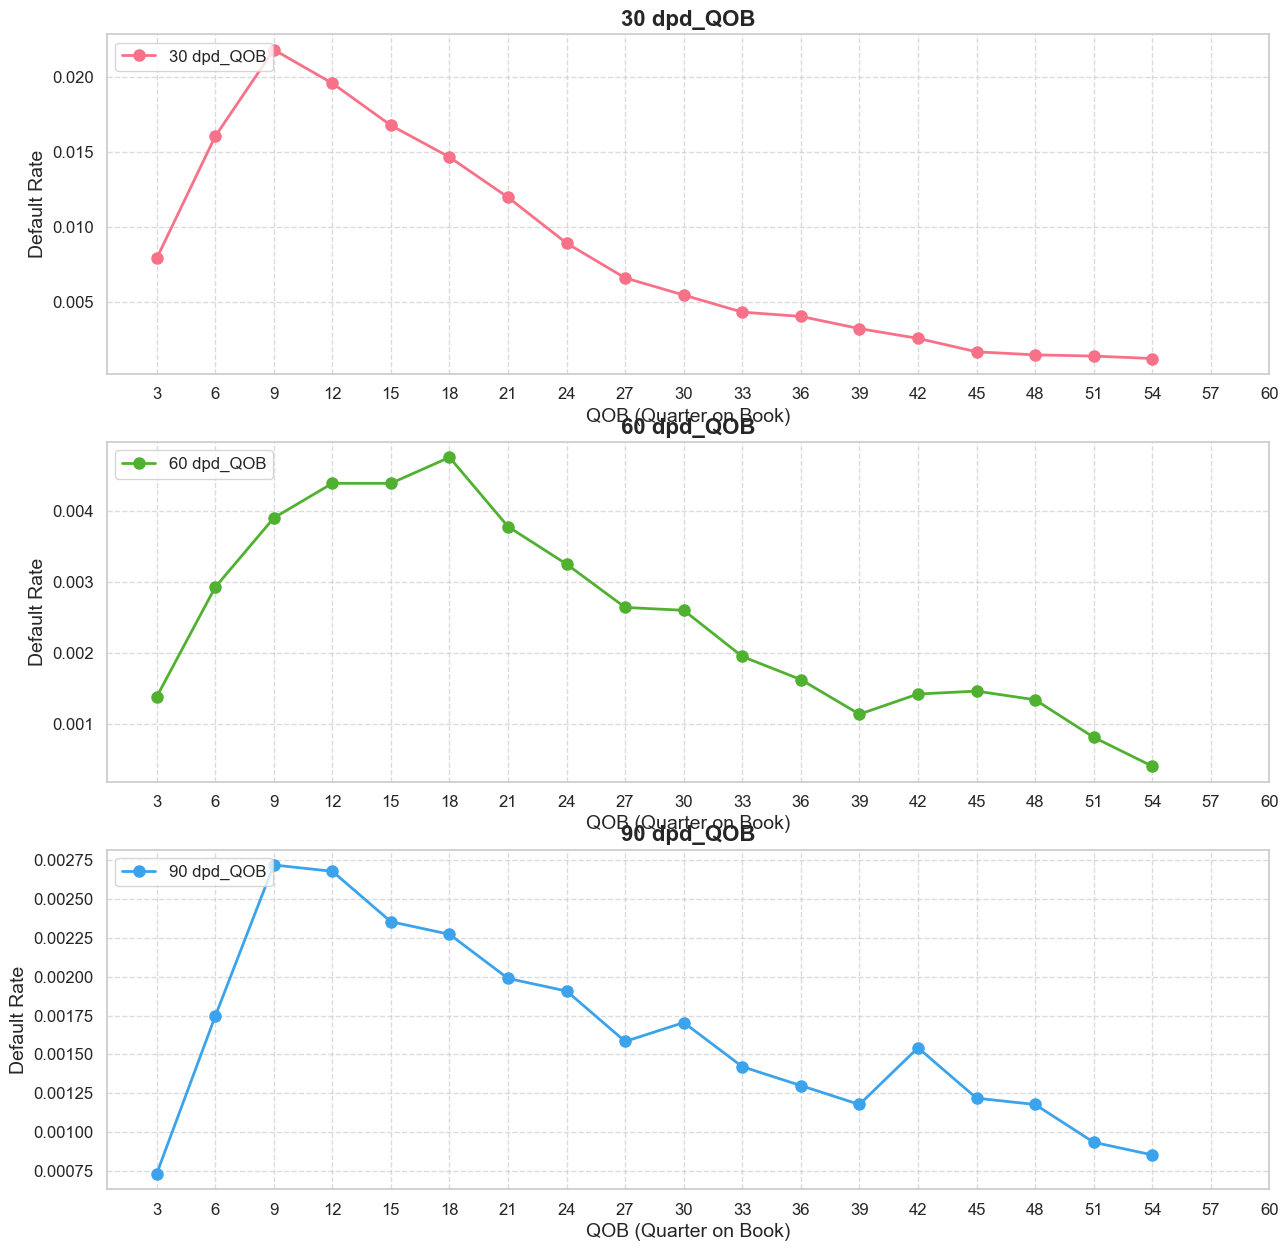

In [109]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 3) 

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# List of columns and titles
columns = df_final.columns[3:7]
titles = df_final.columns[3:7]

# Plot data on each subplot
for i in range(len(columns)):
    ax[i].plot(df_final.index, df_final[columns[i]].values, label=columns[i], marker='o', 
                color=palette[i], linestyle='-', linewidth=2, markersize=8)
    ax[i].set_xticks(criteria_values)
    ax[i].set_title(titles[i], fontsize=16, fontweight='bold')
    ax[i].legend(loc='upper left', fontsize=12)
    ax[i].set_xlabel('QOB (Quarter on Book)', fontsize=14)
    ax[i].set_ylabel('Default Rate', fontsize=14)
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].grid(True, linestyle='--', alpha=0.7)


# Adjust layout to make room for the main title
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [113]:
df_final.columns[6:9]

Index(['30 dpd_QOB_cumulative', '60 dpd_QOB_cumulative',
       '90 dpd_QOB_cumulative'],
      dtype='object')

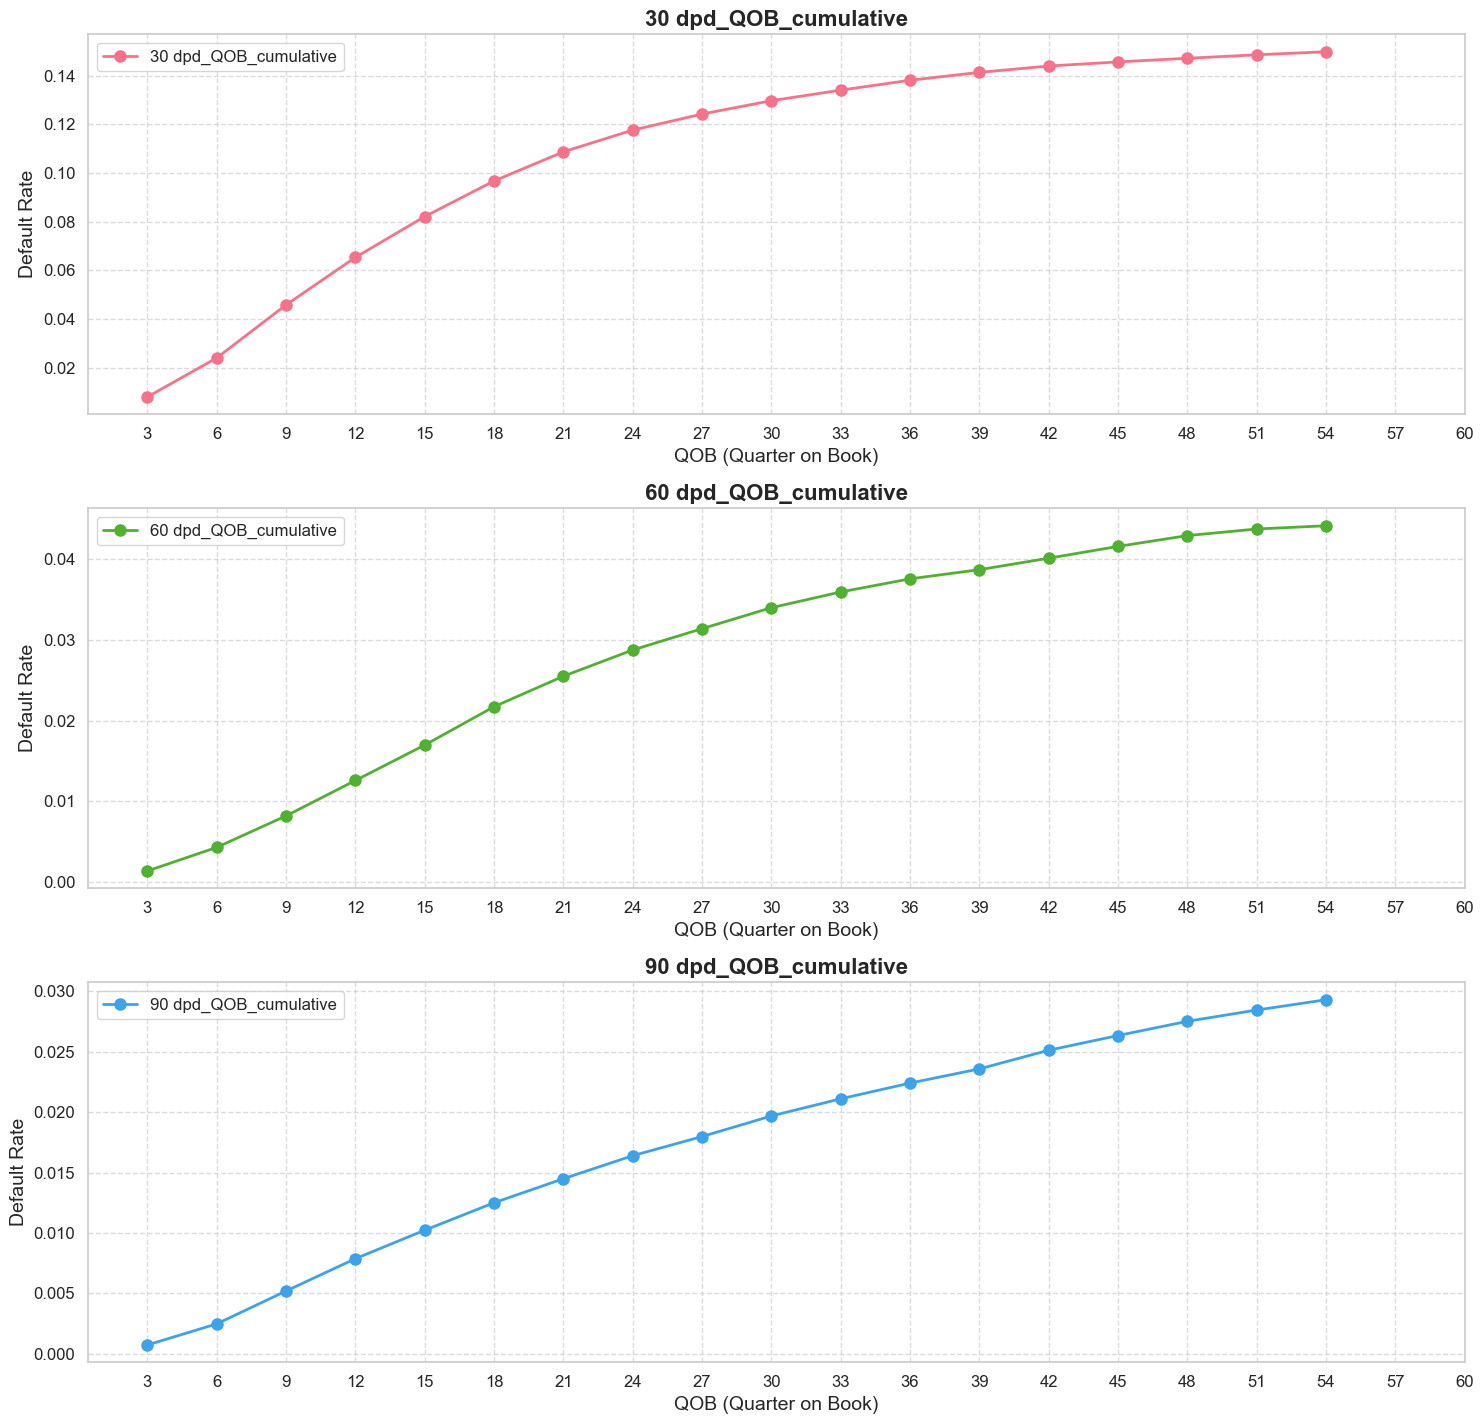

In [114]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 3) 

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# List of columns and titles
columns = df_final.columns[6:9]
titles = df_final.columns[6:9]

# Plot data on each subplot
for i in range(len(columns)):
    # Calculate cumulative sum
    #cumulative_data = df_final[columns[i]].cumsum()
    # ax[i].plot(df_final.index,cumulative_data.values, df_final[columns[i]].values, label=columns[i], marker='o', 
    #            color=palette[i], linestyle='-', linewidth=2, markersize=8)
    # ax[i].plot(df_final.index, cumulative_data.values, label='Cumulative ' + columns[i], 
    #            marker='o', color=palette[i], linestyle='-', linewidth=2, markersize=8)
    ax[i].plot(df_final.index, df_final[columns[i]].values, label=columns[i], marker='o', 
                color=palette[i], linestyle='-', linewidth=2, markersize=8)
    ax[i].set_xticks(criteria_values)
    ax[i].set_title(titles[i], fontsize=16, fontweight='bold')
    ax[i].legend(loc='upper left', fontsize=12)
    ax[i].set_xlabel('QOB (Quarter on Book)', fontsize=14)
    ax[i].set_ylabel('Default Rate', fontsize=14)
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].grid(True, linestyle='--', alpha=0.7)


# Adjust layout to make room for the main title
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


# Conclusion
### Default rate is highest at 9 QOB when 30 dpd is the default definition### Default rate is highest at 18 QOB when 60 dpd is the default definition.### Default rate is highest at 9 QOB when 90 dpd is the default definition.




# Roll Rate Analysis

In [88]:
#importing dataset
df_roll = pd.read_csv('Roll Rate Data.csv')
df_roll.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency,Bucket
0,100393376629,20-01-2018,7.625,7.625,50000,32189.25,360,19-12-1999,216,20-01-2030,90,37,716,0,0
1,100393376629,20-02-2018,7.625,7.625,50000,32038.33,360,19-12-1999,217,20-01-2030,90,37,716,0,0
2,100393376629,20-03-2018,7.625,7.625,50000,31886.45,360,19-12-1999,218,20-01-2030,90,37,716,0,0
3,100393376629,20-04-2018,7.625,7.625,50000,31733.60,360,19-12-1999,219,20-01-2030,90,37,716,0,0
4,100393376629,20-05-2018,7.625,7.625,50000,31579.78,360,19-12-1999,220,20-01-2030,90,37,716,0,0


In [89]:
# Calculate the count of unique reporting months for each account
df_roll['count'] = df_roll.groupby('Loan Id')['Reporting Month'].transform('nunique')

# Filter the DataFrame to keep only those accounts with exactly 12 unique reporting months
filtered_df = df_roll[df_roll['count'] == 12]
filtered_df.head()

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Delinquency,Bucket,count
0,100393376629,20-01-2018,7.625,7.625,50000,32189.25,360,19-12-1999,216,20-01-2030,90,37,716,0,0,12
1,100393376629,20-02-2018,7.625,7.625,50000,32038.33,360,19-12-1999,217,20-01-2030,90,37,716,0,0,12
2,100393376629,20-03-2018,7.625,7.625,50000,31886.45,360,19-12-1999,218,20-01-2030,90,37,716,0,0,12
3,100393376629,20-04-2018,7.625,7.625,50000,31733.60,360,19-12-1999,219,20-01-2030,90,37,716,0,0,12
4,100393376629,20-05-2018,7.625,7.625,50000,31579.78,360,19-12-1999,220,20-01-2030,90,37,716,0,0,12


In [90]:
filtered_df['Reporting Month'] = pd.to_datetime(df_roll['Reporting Month'])

In [91]:
Source_Month = filtered_df['Reporting Month'].min()
Source_Month

Timestamp('2018-01-20 00:00:00')

In [92]:
Destination_Month = pd.to_datetime(filtered_df['Reporting Month'].min()) + pd.DateOffset(months=11)
Destination_Month

Timestamp('2018-12-20 00:00:00')

In [93]:
df_sourceNdestination = pd.DataFrame(
    {
        'Load_Id' : filtered_df['Loan Id'].unique(),
        'Source_Bucket' : filtered_df[filtered_df['Reporting Month'] == Source_Month]['Bucket'].values,
        'Destination_Bucket' : filtered_df[filtered_df['Reporting Month'] == Destination_Month]['Bucket'].values
    }
)

In [94]:
df_sourceNdestination

,Load_Id,Source_Bucket,Destination_Bucket
0,100393376629,0,0
1,101153021562,1,0
2,101978414050,0,0
3,102212231837,0,0
4,104520606701,0,0
...,...,...,...
14876,130699332150,0,0
14877,130742676465,0,0
14878,130742997486,0,0
14879,130746600244,0,1


In [95]:
#Transition Matrix
pivot_TM = pd.pivot_table(
    df_sourceNdestination,
    values='Load_Id',
    index=['Source_Bucket'],
    columns=['Destination_Bucket'],
    aggfunc='count',
    fill_value=0
)

pivot_TM

Destination_Bucket,0,1,2,3,4,5,6
Source_Bucket,,,,,,,
0,13025,339,73,33,20,9,34
1,373,226,63,28,11,11,23
2,72,49,27,16,8,5,19
3,56,20,12,12,2,5,14
4,50,15,4,2,0,3,16
5,32,8,4,0,3,2,12
6,33,7,6,3,3,3,90


In [96]:
#Adding a column for Total no. of A/Cs in each bucket
pivot_TM['Total_Accounts'] = pivot_TM.sum(axis = 1)
pivot_TM

Destination_Bucket,0,1,2,3,4,5,6,Total_Accounts
Source_Bucket,,,,,,,,
0,13025,339,73,33,20,9,34,13533
1,373,226,63,28,11,11,23,735
2,72,49,27,16,8,5,19,196
3,56,20,12,12,2,5,14,121
4,50,15,4,2,0,3,16,90
5,32,8,4,0,3,2,12,61
6,33,7,6,3,3,3,90,145


In [97]:
# Calculate roll back(upgrade) column
rollback_values = []
rollforward_values = []
for index, row in pivot_TM.iterrows():
    rollback_values.append(sum(row[:index]) / row['Total_Accounts'])
    rollforward_values.append(sum(row[index+1:pivot_TM.shape[0]]) / row['Total_Accounts'])

# Add rollforward and rollbackward column column to DataFrame
pivot_TM['Roll_Back (Upgardes)'] = rollback_values
pivot_TM['Roll_Back (Upgardes)'] = (pivot_TM['Roll_Back (Upgardes)'] * 100).map("{:.2f}%".format)
pivot_TM['Roll_Forward (Downgrades)'] = rollforward_values
pivot_TM['Roll_Forward (Downgrades)'] = (pivot_TM['Roll_Forward (Downgrades)'] * 100).map("{:.2f}%".format)
pivot_TM

Destination_Bucket,0,1,2,3,4,5,6,Total_Accounts,Roll_Back (Upgardes),Roll_Forward (Downgrades)
Source_Bucket,,,,,,,,,,
0,13025,339,73,33,20,9,34,13533,0.00%,3.75%
1,373,226,63,28,11,11,23,735,50.75%,18.50%
2,72,49,27,16,8,5,19,196,61.73%,24.49%
3,56,20,12,12,2,5,14,121,72.73%,17.36%
4,50,15,4,2,0,3,16,90,78.89%,21.11%
5,32,8,4,0,3,2,12,61,77.05%,19.67%
6,33,7,6,3,3,3,90,145,37.93%,0.00%


Text(0, 0.5, 'Roll Backward rate (in %)')

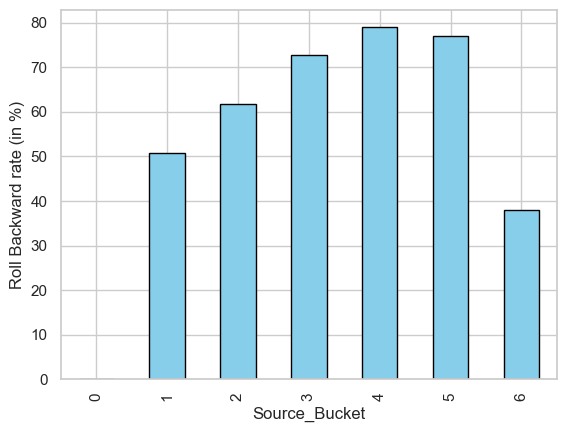

In [98]:
#plot the roll backward rate for each bucket
pivot_TM['Roll_Back (Upgardes)'].str.rstrip('%').astype(float).plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Roll Backward rate (in %)')

Text(0, 0.5, 'Roll Forward rate (in %)')

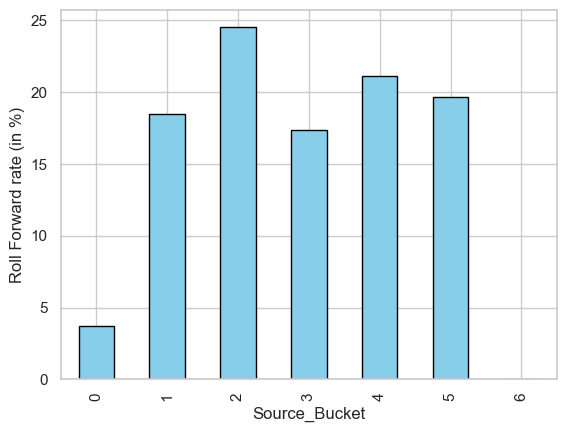

In [99]:
#plot the roll forward rate for each bucket
pivot_TM['Roll_Forward (Downgrades)'].str.rstrip('%').astype(float).plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Roll Forward rate (in %)')

# Conclusion
# We will take 150+ dpd as definition of default as chances of curing of accounts after that is very low.
